# **Waze Project**
**Course 6 - The nuts and bolts of machine learning**

# **Build a machine learning model**


### **Task 1. Imports and data loading**

Import packages and libraries needed to build and evaluate random forest and XGBoost classification models.

In [238]:
# Import packages for data manipulation
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import packages for data modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, PredefinedSplit
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import roc_auc_score, roc_curve 

# This is the function that helps plot feature importance
from xgboost import XGBClassifier
from xgboost import plot_importance

# # This module lets us save our models once we fit them.
import pickle

In [239]:
# Import dataset
df0 = pd.read_csv('waze_dataset.csv')

In [240]:
# Inspect the first five rows
df0.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


In [241]:
# Copy the df0 dataframe
df = df0.copy()

Call `info()` on the new dataframe so the existing columns can be easily referenced.

In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


#### **`km_per_driving_day`**


In [243]:
# 1. Create `km_per_driving_day` feature
df['km_per_driving_day'] = df['driven_km_drives'] / df['driving_days']

# 2. Get descriptive stats
df['km_per_driving_day'].describe()

count    1.499900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.672804e+02
50%      3.231459e+02
75%      7.579257e+02
max               inf
Name: km_per_driving_day, dtype: float64

In [244]:
# 1. Convert infinite values to zero
# df['km_per_driving_day'] = np.where(df['km_per_driving_day'] == np.inf, 0, df['km_per_driving_day'])
mask = df['km_per_driving_day'] == np.inf
df.loc[mask, 'km_per_driving_day'] = 0

# 2. Confirm that it worked
df['km_per_driving_day'].describe()

count    14999.000000
mean       578.963113
std       1030.094384
min          0.000000
25%        136.238895
50%        272.889272
75%        558.686918
max      15420.234110
Name: km_per_driving_day, dtype: float64

#### **`percent_sessions_in_last_month`**


In [245]:
# 1. Create `percent_sessions_in_last_month` feature
df['percent_sessions_in_last_month'] = df['sessions'] / df['total_sessions']

# 1. Get descriptive stats
df['percent_sessions_in_last_month'].describe()

count    14999.000000
mean         0.449255
std          0.286919
min          0.000000
25%          0.196221
50%          0.423097
75%          0.687216
max          1.530637
Name: percent_sessions_in_last_month, dtype: float64

#### **`professional_driver`**

In [246]:
# Create `professional_driver` feature
df['professional_driver'] = np.where((df['drives'] >= 60) & (df['driving_days'] >= 15), 1, 0)

#### **`total_sessions_per_day`**

In [247]:
# Create `total_sessions_per_day` feature
df['total_sessions_per_day'] = df['total_sessions'] / df['n_days_after_onboarding']

As with other features, get descriptive statistics for this new feature.

In [248]:
# Get descriptive stats
df['total_sessions_per_day'].describe()

count    14999.000000
mean         0.338698
std          1.314333
min          0.000298
25%          0.051037
50%          0.100775
75%          0.216269
max         39.763874
Name: total_sessions_per_day, dtype: float64

#### **`km_per_hour`**

In [249]:
# Create `km_per_hour` feature
df['km_per_hour'] = df['driven_km_drives'] / (df['duration_minutes_drives']/60)
df['km_per_hour'].describe()

count    14999.000000
mean       190.394608
std        334.674026
min         72.013095
25%         90.706222
50%        122.382022
75%        193.130119
max      23642.920871
Name: km_per_hour, dtype: float64

#### **`km_per_drive`**

In [250]:
# Create `km_per_drive` feature
df['km_per_drive'] = df['driven_km_drives'] / df['drives']
df['km_per_drive'].describe()

count    1.499900e+04
mean              inf
std               NaN
min      1.008775e+00
25%      3.323065e+01
50%      7.488006e+01
75%      1.854667e+02
max               inf
Name: km_per_drive, dtype: float64

In [251]:
# 1. Convert infinite values to zero
df['km_per_drive'] = np.where(df['km_per_drive'] == np.inf, 0, df['km_per_drive'])

# 2. Confirm that it worked
df['km_per_drive'].describe()

count    14999.000000
mean       232.817946
std        620.622351
min          0.000000
25%         32.424301
50%         72.854343
75%        179.347527
max      15777.426560
Name: km_per_drive, dtype: float64

#### **`percent_of_sessions_to_favorite`**

In [252]:
# Create `percent_of_sessions_to_favorite` feature
df['percent_of_sessions_to_favorite'] = (df['total_navigations_fav1'] + df['total_navigations_fav1']) / df['total_sessions']

# Get descriptive stats
df['percent_of_sessions_to_favorite'].describe()

count    14999.000000
mean         2.737632
std         17.209993
min          0.000000
25%          0.094414
50%          0.843515
75%          2.563099
max       1509.208146
Name: percent_of_sessions_to_favorite, dtype: float64

In [253]:
# df = df.dropna(axis=0).reset_index(drop=True)
# print(df.shape)
# df.isna().sum()

In [254]:
# Drop rows with missing values
df = df.dropna(subset=['label'])
print(df.shape)
df.isna().sum()

(14299, 20)


ID                                 0
label                              0
sessions                           0
drives                             0
total_sessions                     0
n_days_after_onboarding            0
total_navigations_fav1             0
total_navigations_fav2             0
driven_km_drives                   0
duration_minutes_drives            0
activity_days                      0
driving_days                       0
device                             0
km_per_driving_day                 0
percent_sessions_in_last_month     0
professional_driver                0
total_sessions_per_day             0
km_per_hour                        0
km_per_drive                       0
percent_of_sessions_to_favorite    0
dtype: int64

In [255]:
# Create new `device2` variable
df['device2'] = df['device'].map({'Android': 0, 'iPhone': 1})

In [256]:
# Create binary `label2` column
df['label2'] = np.where(df['label'] == 'retained', 0, 1) 
df[['label', 'label2']].tail()

,label,label2
14994,retained,0
14995,retained,0
14996,retained,0
14997,churned,1
14998,retained,0


In [257]:
# Drop `ID` column
df = df.drop('ID', axis=1)

In [258]:
# Get class balance of 'label' col
df['label'].value_counts(normalize=True)

label
retained    0.822645
churned     0.177355
Name: proportion, dtype: float64

Approximately 18% of the users in this dataset churned. This is an unbalanced dataset, but not extremely so. It can be modeled without any class rebalancing.

Now, consider which evaluation metric is best. Remember, accuracy might not be the best gauge of performance because a model can have high accuracy on an imbalanced dataset and still fail to predict the minority class.

It was already determined that the risks involved in making a false positive prediction are minimal. No one stands to get hurt, lose money, or suffer any other significant consequence if they are predicted to churn. Therefore, select the model based on the recall score.

In [259]:
# 1. Isolate X variables
X = df.drop(columns=['device', 'label', 'label2'], axis=1)

# 2. Isolate y variable
y = df['label2']

print(f'X.shape: {X.shape}')
print(f'y.shape: {y.shape}')

# 3. Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print(f'X_train.shape: {X_train.shape}')
print(f'X_test.shape: {X_test.shape}')
print(f'y_train.shape: {y_train.shape}')
print(f'y_test.shape: {y_test.shape}')

# 4. Split into train and validate sets
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.25, stratify=y_train, random_state=42)

X.shape: (14299, 18)
y.shape: (14299,)
X_train.shape: (11439, 18)
X_test.shape: (2860, 18)
y_train.shape: (11439,)
y_test.shape: (2860,)


In [260]:
print(f'X_train.shape: {X_train.shape}')
print(f'X_test.shape: {X_test.shape}')
print(f'y_train.shape: {y_train.shape}')
print(f'y_test.shape: {y_test.shape}')

print(f'X_tr.shape: {X_tr.shape}')
print(f'X_val.shape: {X_val.shape}')
print(f'y_tr.shape: {y_tr.shape}')
print(f'y_val.shape: {y_val.shape}')

X_train.shape: (11439, 18)
X_test.shape: (2860, 18)
y_train.shape: (11439,)
y_test.shape: (2860,)
X_tr.shape: (8579, 18)
X_val.shape: (2860, 18)
y_tr.shape: (8579,)
y_val.shape: (2860,)


### **Task 10. Modeling**

In [261]:
for x in [X_tr, X_val, X_test]:
    print(len(x))

8579
2860
2860


In [262]:
# 1. Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=42)

# 2. Create a dictionary of hyperparameters to tune
cv_params = {
    'max_depth': [None],
    'max_features': [1.0],
    'max_samples': [1.0],
    'min_samples_leaf': [2], 
    'min_samples_split': [2],
    'n_estimators': [300]
}


# 3. Define a list of scoring metrics to capture
scoring = ['accuracy', 'f1', 'precision', 'recall']

# 4. Instantiate the GridSearchCV object
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='recall')

In [263]:
%%time
rf_cv.fit(X_tr, y_tr)

CPU times: user 2min 39s, sys: 11.9 ms, total: 2min 39s
Wall time: 2min 39s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None], 'max_features': [1.0],
                         'max_samples': [1.0], 'min_samples_leaf': [2],
                         'min_samples_split': [2], 'n_estimators': [300]},
             refit='recall', scoring=['accuracy', 'f1', 'precision', 'recall'])

In [264]:
import pickle 

# Define a path to the folder where you want to save the model
path = '/home/jovyan/work/'

In [265]:
def write_pickle(path, model_object, save_name:str):
    '''
    save_name is a string.
    '''
    with open(path + save_name + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [266]:
def read_pickle(path, saved_model_name:str):
    '''
    saved_model_name is a string.
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

        return model

In [267]:
write_pickle(path, rf_cv, 'rf_cv_waze')

In [268]:
# Examine best score
rf_cv.best_score_

0.12218538472164664

In [269]:
# Examine best hyperparameter combo
rf_cv.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 1.0,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

In [270]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy',
                   }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          },
                         )

    return table

Pass the `GridSearch` object to the `make_results()` function.

In [271]:
path = '/home/jovyan/work/'

In [272]:
rf_cv_results = make_results('RandomForestClassifier CV', rf_cv, 'recall')
rf_cv_results

,model,precision,recall,F1,accuracy
0,RandomForestClassifier CV,0.464125,0.122185,0.19334,0.819442


In [273]:
rf_cv_results.to_csv(path + 'rf_cv_results_becca.csv')

In [274]:
xgb = XGBClassifier(objective='binary:logistic', random_state=42)
print(xgb.get_params())

{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


In [275]:
# 1. Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=42)

# 2. Create a dictionary of hyperparameters to tune
cv_params = {
    'max_depth': [6, 12],
    'min_child_weight': [3, 5],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [300]
}

# 3. Define a list of scoring metrics to capture
scoring = ['accuracy', 'f1', 'recall', 'precision']

# 4. Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=4, refit='recall')

Now fit the model to the `X_train` and `y_train` data.

Note this cell might take several minutes to run.

In [276]:
xgb_cv.fit(X_tr, y_tr)

GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [6, 12],
                         'min_child_weight': [3, 5], 'n_estimators': [300]},
             refit='recall', scoring=['accuracy', 'f1', 'recall', 'precision'])

Get the best score from this model.

In [277]:
write_pickle(path, xgb_cv, 'xgb_cv_waze')

In [278]:
# Examine best score
xgb_cv.best_score_ #0.16623166522864538, 0.16427165354330708

0.16885619560712806

And the best parameters.

In [279]:
# Examine best parameters
xgb_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 12,
 'min_child_weight': 3,
 'n_estimators': 300}

Use the `make_results()` function to output all of the scores of your model. Note that the function accepts three arguments.

In [280]:
# Call 'make_results()' on the GridSearch object
xgb_cv_results = make_results('XGBoost Classifier CV', xgb_cv, 'recall')
xgb_cv_results

,model,precision,recall,F1,accuracy
0,XGBoost Classifier CV,0.417392,0.168856,0.240105,0.8107


In [281]:
xgb_cv_results.to_csv(path + 'xgb_cv_results_becca.csv')

In [282]:
combined_results = pd.concat([rf_cv_results, xgb_cv_results], axis=0)
combined_results

,model,precision,recall,F1,accuracy
0,RandomForestClassifier CV,0.464125,0.122185,0.193340,0.819442
0,XGBoost Classifier CV,0.417392,0.168856,0.240105,0.810700


In [283]:
combined_results.to_csv(path + 'waze_combined_results.csv')

In [284]:
# Use random forest model to predict on validation data
rf_val_preds = rf_cv.best_estimator_.predict(X_val)

Use the `get_test_scores()` function to generate a table of scores from the predictions on the validation data.

In [285]:
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
        model_name (string): Your choice: how the model will be named in the output table
        preds: numpy array of test predictions
        y_test_data: numpy array of y_test data

    Out:
        table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy]
                          })

    return table

In [286]:
# Get validation scores for RF model
rf_val_scores = get_test_scores('Best RF val', rf_val_preds, y_val)

# Append to the results table
combined_results = pd.concat([combined_results, rf_val_scores], axis=0)
combined_results

,model,precision,recall,F1,accuracy
0,RandomForestClassifier CV,0.464125,0.122185,0.193340,0.819442
0,XGBoost Classifier CV,0.417392,0.168856,0.240105,0.810700
0,Best RF val,0.450000,0.124260,0.194745,0.817832


In [287]:
# Use XGBoost model to predict on validation data
xgb_val_preds = xgb_cv.best_estimator_.predict(X_val)

# Get validation scores for XGBoost model
xgb_val_scores = get_test_scores('Best XGB val', xgb_val_preds, y_val)

# Append to the results table
combined_results = pd.concat([combined_results, xgb_val_scores], axis=0)
combined_results

,model,precision,recall,F1,accuracy
0,RandomForestClassifier CV,0.464125,0.122185,0.193340,0.819442
0,XGBoost Classifier CV,0.417392,0.168856,0.240105,0.810700
0,Best RF val,0.450000,0.124260,0.194745,0.817832
0,Best XGB val,0.386473,0.157791,0.224090,0.806294


In [288]:
combined_results.to_csv(path + 'combined_results_waze.csv')

In [289]:
# Use XGBoost model to predict on test data
xgb_test_preds = xgb_cv.best_estimator_.predict(X_test)

# Get test scores for XGBoost model
xgb_test_scores = get_test_scores('Best XGB test', xgb_test_preds, y_test)

# Append to the results table
combined_results = pd.concat([xgb_test_scores, combined_results], axis=0)
combined_results.sort_values(by=['recall'], ascending=False)

,model,precision,recall,F1,accuracy
0,Best XGB test,0.418502,0.187377,0.258856,0.809790
0,XGBoost Classifier CV,0.417392,0.168856,0.240105,0.810700
0,Best XGB val,0.386473,0.157791,0.224090,0.806294
0,Best RF val,0.450000,0.124260,0.194745,0.817832
0,RandomForestClassifier CV,0.464125,0.122185,0.193340,0.819442


In [290]:
combined_results.to_csv(path + 'combined_results_waze.csv')

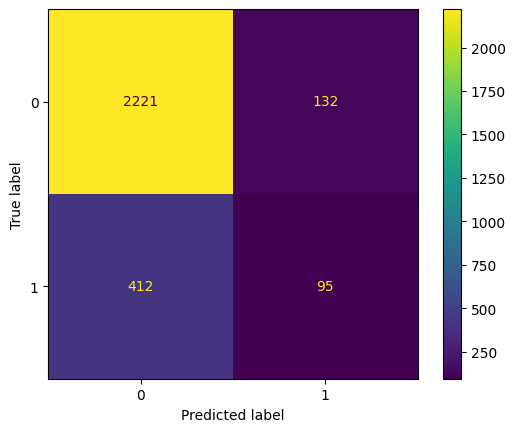

In [291]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_test, xgb_test_preds, labels=xgb_cv.best_estimator_.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(cm, display_labels=xgb_cv.best_estimator_.classes_)
disp.plot(values_format='')
plt.show()

The model predicted three times as many false negatives than it did false positives, and it correctly identified only (18.7% is what I got) 16.6% of the users who actually churned.

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

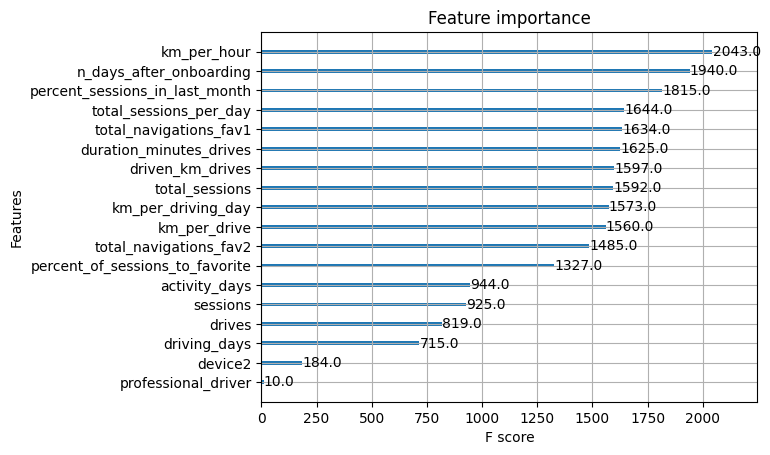

In [292]:
plot_importance(xgb_cv.best_estimator_)

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.